### importing libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn .metrics import classification_report,confusion_matrix
from keras.layers.normalization import BatchNormalization
import os
import h5py

### loading of training and testing data

In [2]:
df= pd.read_csv("fashion-mnist_train.csv")  
df1= pd.read_csv("fashion-mnist_test.csv")

In [3]:
df1.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0


In [4]:
df.shape,df1.shape

((60000, 785), (10000, 785))

In [5]:
x_train=df.drop('label',1) 
xtrain=np.array(x_train)
y_train=df['label']

x_test=df1.drop('label',1)
xtest=np.array(x_test)
y_test=df1['label']

In [6]:
xtrain.shape, xtest.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [7]:
xtrain = xtrain/255.0   # scaling the data within (0,1)
xtest = xtest/255.0

In [8]:
xtrain.max(),xtest.max()

(1.0, 1.0)

In [9]:
clothing=  {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

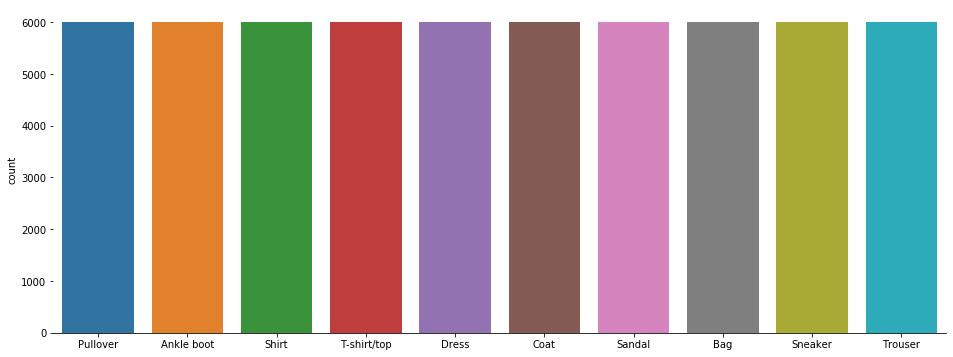

In [10]:
label = []
for i in range(len(y_train)):
    label.append(clothing[y_train[i]])
    
fig = plt.figure(figsize=(16,6))
sns.countplot(label)
sns.despine(left=True)
plt.show()

In [11]:
ytrain= keras.utils.to_categorical(y_train,num_classes=10)
ytest=keras.utils.to_categorical(y_test,num_classes=10)

In [12]:
l=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# *Making CNN Model

In [13]:
Xtrain=xtrain.reshape(-1,28,28,1)
Xtest=xtest.reshape(-1,28,28,1)
Xtrain.shape, Xtest.shape
ytrain.shape, ytest.shape, Xtrain[0].shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
ytrain.shape, ytest.shape, Xtrain[0].shape

((60000, 10), (10000, 10), (28, 28, 1))

In [15]:
Xtrain[0].shape

(28, 28, 1)

In [16]:
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5),padding='same', activation='relu',kernel_initializer='he_uniform', input_shape=(Xtrain[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'))
#model.add(Dropout(0.5))
#model.add(MaxPooling2D(pool_size=(2, 2)))


# ANN-LAYERS
model.add(Flatten())

model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.5))


# Classification layer
model.add(Dense(10, activation='softmax'))

adam = Adam()
#rms = RMSprop(learning_rate=0.00004, decay=1e-6, rho=0.92)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4832      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         96120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)              

In [19]:
hist = model.fit(Xtrain, ytrain, validation_data=(Xtest,ytest),epochs=60,batch_size=128,verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 24s 395us/step - loss: 0.5970 - accuracy: 0.7834 - val_loss: 0.4570 - val_accuracy: 0.8573
Epoch 2/60
60000/60000 [==============================] - 22s 363us/step - loss: 0.3981 - accuracy: 0.8544 - val_loss: 0.4085 - val_accuracy: 0.8763
Epoch 3/60
60000/60000 [==============================] - 21s 357us/step - loss: 0.3496 - accuracy: 0.8727 - val_loss: 0.3494 - val_accuracy: 0.8901
Epoch 4/60
60000/60000 [==============================] - 22s 367us/step - loss: 0.3239 - accuracy: 0.8816 - val_loss: 0.3147 - val_accuracy: 0.8938
Epoch 5/60
60000/60000 [==============================] - 22s 366us/step - loss: 0.3035 - accuracy: 0.8869 - val_loss: 0.2969 - val_accuracy: 0.8976
Epoch 6/60
60000/60000 [==============================] - 22s 365us/step - loss: 0.2913 - accuracy: 0.8918 - val_loss: 0.2926 - val_accuracy: 0.8999
Epoch 7/60
60000/60000 [==============================]

Epoch 54/60
60000/60000 [==============================] - 22s 365us/step - loss: 0.1177 - accuracy: 0.9553 - val_loss: 0.2335 - val_accuracy: 0.9194
Epoch 55/60
60000/60000 [==============================] - 24s 407us/step - loss: 0.1193 - accuracy: 0.9546 - val_loss: 0.2260 - val_accuracy: 0.9185
Epoch 56/60
60000/60000 [==============================] - 23s 380us/step - loss: 0.1186 - accuracy: 0.9547 - val_loss: 0.2381 - val_accuracy: 0.9171
Epoch 57/60
60000/60000 [==============================] - 21s 345us/step - loss: 0.1149 - accuracy: 0.9562 - val_loss: 0.2322 - val_accuracy: 0.9200
Epoch 58/60
60000/60000 [==============================] - 21s 356us/step - loss: 0.1142 - accuracy: 0.9561 - val_loss: 0.2364 - val_accuracy: 0.9192
Epoch 59/60
60000/60000 [==============================] - 23s 388us/step - loss: 0.1146 - accuracy: 0.9561 - val_loss: 0.2394 - val_accuracy: 0.9175
Epoch 60/60
60000/60000 [==============================] - 24s 401us/step - loss: 0.1127 - accuracy:

In [ ]:
#score = model.evaluate(Xtest, ytest)
#print('Test Loss:', score[0])
#print('Test accuracy:', score[1])

In [20]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

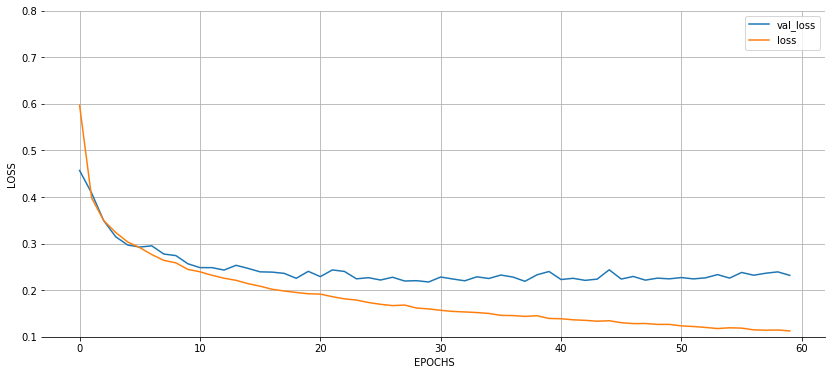

In [21]:
fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()


Value Accuracy |  92.07 %


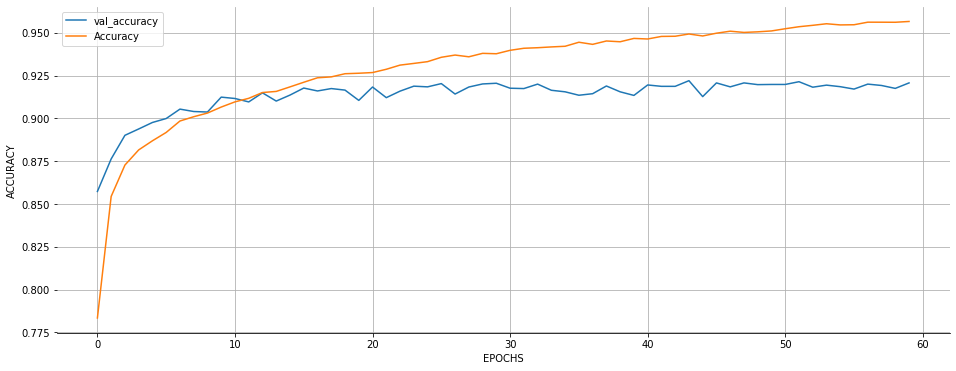

In [22]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

In [23]:
pred = model.predict(Xtest,batch_size=250)

In [24]:
prd =[]
for i in range(len(pred)):
    prd.append(np.argmax(pred.round()[i]))
    
con = pd.DataFrame(confusion_matrix(y_test,prd),index=l,columns=l)

In [25]:
print('\nConfusion Matrix--->')
con


Confusion Matrix--->


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,894,3,9,14,0,0,78,0,2,0
Trouser,5,981,1,11,0,0,2,0,0,0
Pullover,49,0,839,10,51,0,50,0,1,0
Dress,35,4,4,935,12,0,10,0,0,0
Coat,29,0,21,32,866,0,51,0,1,0
Sandal,2,0,0,0,0,978,0,13,1,6
Shirt,149,0,33,29,36,0,750,0,3,0
Sneaker,1,0,0,0,0,10,0,968,0,21
Bag,4,2,2,0,1,3,4,2,981,1
Ankle boot,1,0,0,0,0,2,0,28,0,969



Confusion Matrix Graph--->


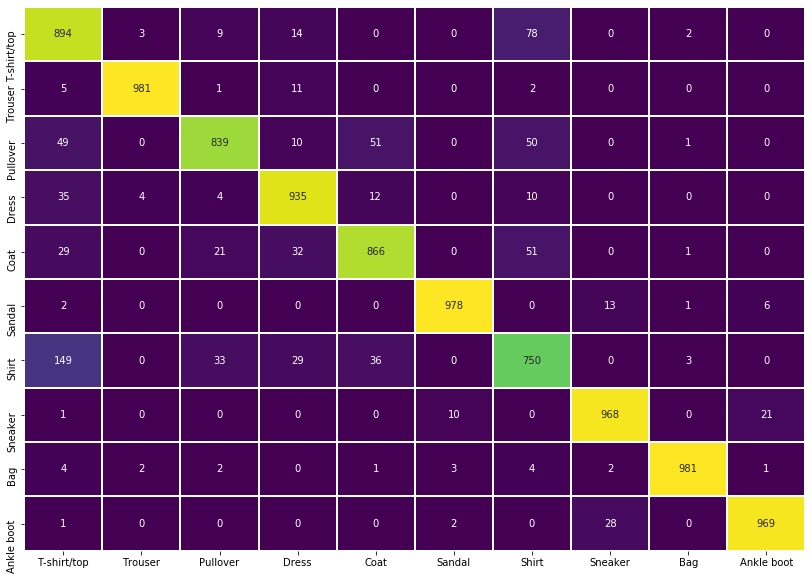

In [26]:
print('\nConfusion Matrix Graph--->')
fig = plt.figure(figsize=(14,10))
sns.heatmap(con,annot=True,cmap='viridis',linewidths=1,cbar=False,fmt='.5g')
plt.show()

In [27]:
pred_label=[]
label=[]
for i in range(len(prd)):
    pred_label.append(clothing[prd[i]])
    label.append(clothing[y_test[i]])
    
print(classification_report(label,pred_label))

              precision    recall  f1-score   support

  Ankle boot       0.97      0.97      0.97      1000
         Bag       0.99      0.98      0.99      1000
        Coat       0.90      0.87      0.88      1000
       Dress       0.91      0.94      0.92      1000
    Pullover       0.92      0.84      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.75      0.77      1000
     Sneaker       0.96      0.97      0.96      1000
 T-shirt/top       0.76      0.89      0.82      1000
     Trouser       0.99      0.98      0.99      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [28]:
model.save('fashion_ann_model.h5') #saving the model
del model

In [31]:
model = load_model('fashion_ann_model.h5')
model.summary()
#print('This Is the first LeNeT Model')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4832      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         96120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)              

In [32]:
Xtest = xtest.reshape(-1,28,28,1)
pred = model.predict(Xtest,batch_size=200,verbose=0)

In [33]:
l = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']

In [34]:
Xtest = Xtest.reshape(-1,28,28)

Some Predicted Images


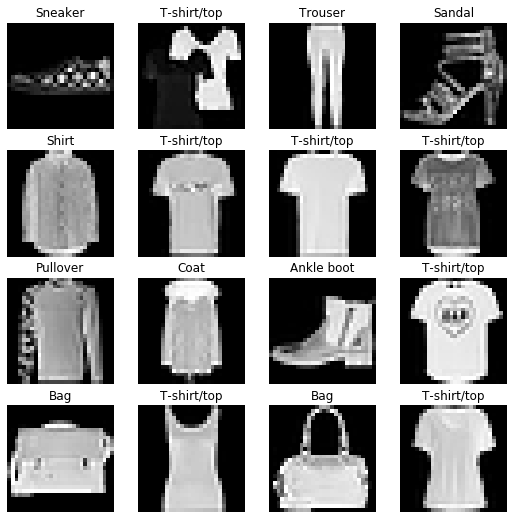

In [35]:
print('Some Predicted Images')
fig, axes = plt.subplots( 4,4,figsize = (9,9))
for row in axes:
    for j in row:
        index = np.random.randint(len(pred))
        j.imshow(Xtest[index],cmap='gray')
        j.set_title(clothing[np.argmax(pred[index])])
        j.set_axis_off()

###### some wrong predictions.

In [36]:

wrong_pred=[]
right_pred=[]
img=[]
for i in range(len(y_test)):
    if y_test[i]==np.argmax(pred[i]):
        right_pred.append(y_test[i])
    else:
        wrong_pred.append(y_test[i])
        img.append(Xtest[i])
        
print('No. of Correct Predictions     : ',len(right_pred))
print('No. of Incorrect Predictions   : ',len(wrong_pred))

No. of Correct Predictions     :  9207
No. of Incorrect Predictions   :  793


Some wrong Predicted images : 


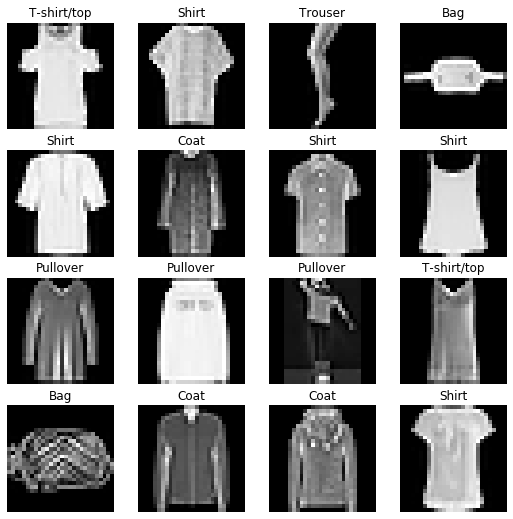

In [37]:
fig, axes = plt.subplots( 4,4,figsize = (9,9))
print('Some wrong Predicted images : ')
for row in axes:
    for j in row:
        index = np.random.randint(len(wrong_pred))
        j.imshow(img[index],cmap='gray')
        j.set_title(clothing[wrong_pred[index]])
        j.set_axis_off()

# Single Prediction :-

In [38]:
def prediction():
    try:
        plt.figure(figsize=(3,3))
        index= int(input("\nEnter index for test data :"))
        print('\n   Predicted Image :',clothing[np.argmax(pred[index])])
        plt.imshow(Xtest[index]*255,cmap='gray')
        plt.axis('off')
        plt.show()
        print('   Original Image :',clothing[np.argmax(ytest[index])])
    except:
        print("Enter index upto 9999")


Enter index for test data :25

   Predicted Image : Sneaker


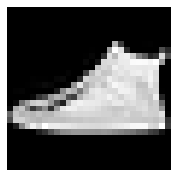

   Original Image : Sneaker


In [39]:
prediction()